In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
%cd 'drive/My Drive/dl_iotlabkiit'

[Errno 2] No such file or directory: 'drive/My Drive/dl_iotlabkiit'
/content/drive/My Drive/dl_iotlabkiit


In [23]:
!ls


fashion-mnist_test.csv	fashion-mnist_train.csv


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import cv2

%matplotlib inline
tf.__version__


'2.2.0'

In [25]:
df=pd.read_csv('fashion-mnist_train.csv')

In [26]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [27]:
train_data=np.array(df,dtype='float32')

In [28]:
df_test=pd.read_csv('fashion-mnist_test.csv',sep=',')

In [29]:
test_data=np.array(df_test,dtype='float32')

In [30]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

Then We will split the Training data into Validation and Training Sets
The Validation Split Will allow the Model see some unseen data while training and hence it will adjust and weights and biases accorrding.

In [31]:
#Splitting the data into Training and Validation Set
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

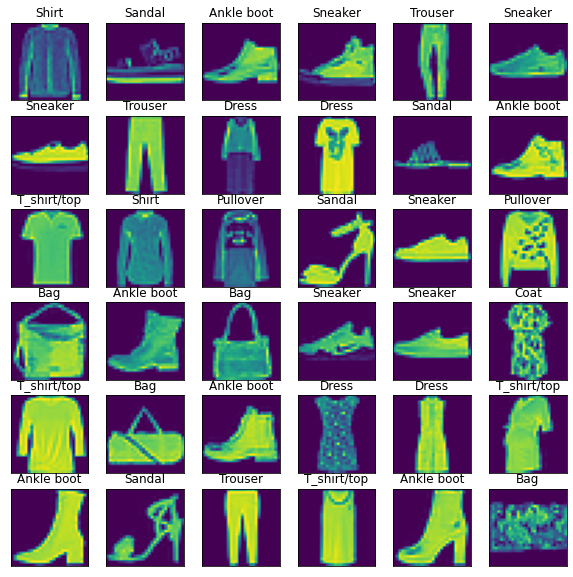

In [32]:
#Plotting Some of the images
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [34]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

In [35]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [40]:
#Building The Model

In [42]:
model=tf.keras.models.Sequential()

In [43]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=image_shape))

In [44]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [45]:
model.add(tf.keras.layers.Dropout(0.2))

In [46]:
model.add(tf.keras.layers.Flatten())

In [47]:
model.add(tf.keras.layers.Dense(32,activation='relu'))

In [49]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
__________________________________________________

In [51]:
#Compiling the Model
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [52]:
#Fitting the Data in the Model
history=model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=15,
    verbose=1,
    validation_data=(x_validate,y_validate)
)

Epoch 1/15
12/12 [==============================] - 15s 1s/step - loss: 1.7086 - accuracy: 0.5006 - val_loss: 1.0605 - val_accuracy: 0.7078
Epoch 2/15
12/12 [==============================] - 15s 1s/step - loss: 0.8384 - accuracy: 0.7490 - val_loss: 0.6657 - val_accuracy: 0.7743
Epoch 3/15
12/12 [==============================] - 16s 1s/step - loss: 0.6266 - accuracy: 0.7840 - val_loss: 0.5705 - val_accuracy: 0.7998
Epoch 4/15
12/12 [==============================] - 16s 1s/step - loss: 0.5516 - accuracy: 0.8108 - val_loss: 0.5189 - val_accuracy: 0.8212
Epoch 5/15
12/12 [==============================] - 16s 1s/step - loss: 0.5056 - accuracy: 0.8268 - val_loss: 0.4789 - val_accuracy: 0.8342
Epoch 6/15
12/12 [==============================] - 16s 1s/step - loss: 0.4715 - accuracy: 0.8381 - val_loss: 0.4516 - val_accuracy: 0.8442
Epoch 7/15
12/12 [==============================] - 16s 1s/step - loss: 0.4496 - accuracy: 0.8438 - val_loss: 0.4348 - val_accuracy: 0.8494
Epoch 8/15
12/12 [==

Text(0.5, 1.0, 'Train - Accuracy')

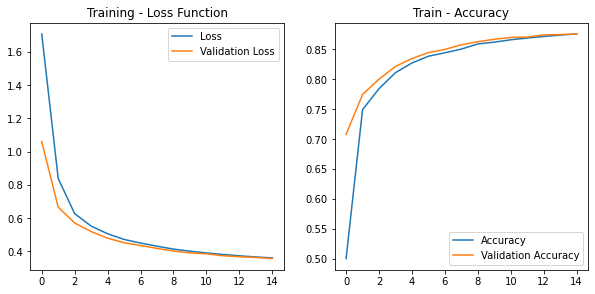

In [55]:
#Plotting Training Accuracy vs Loss
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [56]:
score=model.evaluate(x_test,y_test,verbose=6)

In [59]:
print('Test Loss:',score[0])
print('Test Accuracy: ',score[1])

Test Loss: 0.35224825143814087
Test Accuracy:  0.8827000260353088


We Got a Test Accuracy of 88%


In [65]:
predicted_classes=np.argmax(model.predict(x_test),axis=-1)

In [66]:
predicted_classes

array([0, 1, 6, ..., 8, 8, 1])

In [71]:
#Generating the Classification Report
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test,predicted_classes,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.87      0.83      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.80      0.86      0.83      1000
     Class 3       0.86      0.93      0.90      1000
     Class 4       0.87      0.80      0.83      1000
     Class 5       0.96      0.94      0.95      1000
     Class 6       0.73      0.63      0.68      1000
     Class 7       0.91      0.92      0.91      1000
     Class 8       0.96      0.96      0.96      1000
     Class 9       0.93      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

